In [61]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [62]:
dataset = "../data/data.csv"

df = pd.read_csv(dataset)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [63]:
#drop id column

df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
df.isin([0]).sum()

df['concavity_mean'].replace(0, df['concavity_mean'].mean(), inplace=True)
df['concave points_mean'].replace(0, df['concave points_mean'].mean(), inplace=True)
df['concavity_se'].replace(0, df['concavity_se'].mean(), inplace=True)
df['concave points_se'].replace(0, df['concave points_se'].mean(), inplace=True)
df['concavity_worst'].replace(0, df['concavity_worst'].mean(), inplace=True)
df['concave points_worst'].replace(0, df['concave points_worst'].mean(), inplace=True)

In [65]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
print(df['diagnosis'].value_counts())
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})
df.head()

B    357
M    212
Name: diagnosis, dtype: int64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [67]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

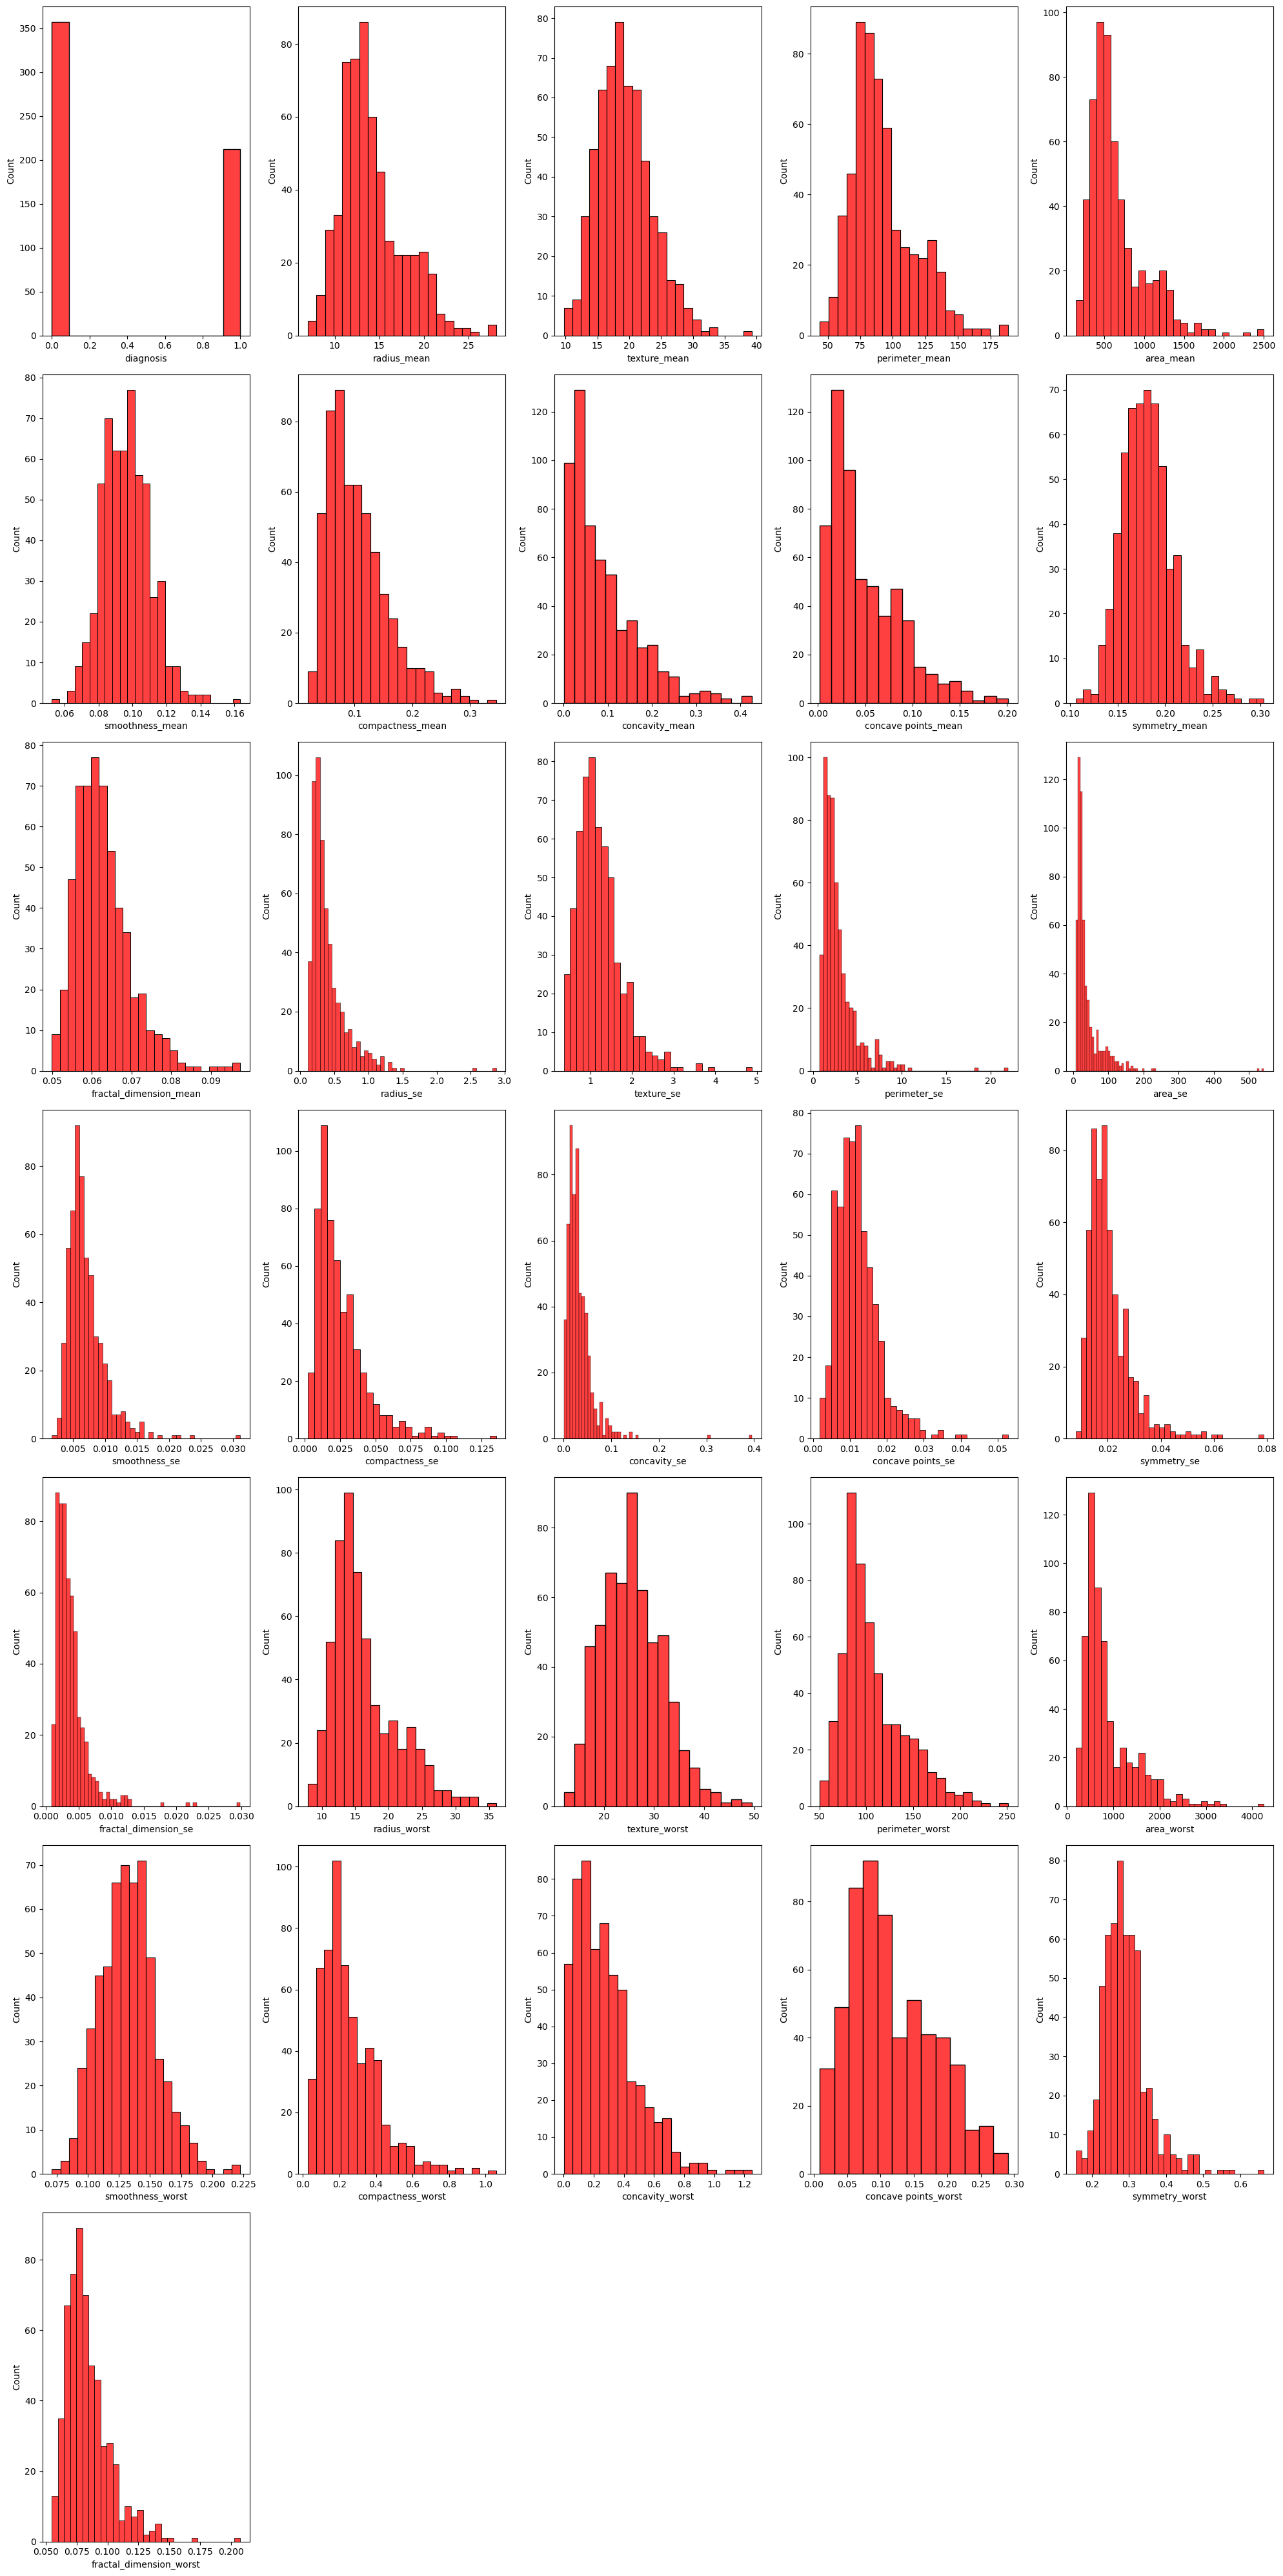

In [68]:
plt.figure(figsize = (20, 40))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 31:
        ax = plt.subplot(7, 5, plotnumber)
        sns.histplot(df[column],color='red',)
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [69]:
train, test = train_test_split(df, test_size=0.4, random_state=28)
train, validation = train_test_split(df, test_size=0.1, random_state=28)

print(f"Train set has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test set has {test.shape[0]} rows and {test.shape[1]} columns")
print(f"Validation set has {validation.shape[0]} rows and {validation.shape[1]} columns")
test.head()

Train set has 512 rows and 31 columns
Test set has 228 rows and 31 columns
Validation set has 57 rows and 31 columns


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
15,1,14.54,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,0.2303,...,17.46,37.13,124.10,943.2,0.16780,0.65770,0.702600,0.171200,0.4218,0.13410
247,0,12.89,14.11,84.95,512.2,0.08760,0.13460,0.137400,0.039800,0.1596,...,14.39,17.70,105.00,639.1,0.12540,0.58490,0.772700,0.156100,0.2639,0.11780
174,0,10.66,15.15,67.49,349.6,0.08792,0.04302,0.088799,0.048919,0.1928,...,11.54,19.20,73.20,408.3,0.10760,0.06791,0.272188,0.114606,0.2710,0.06164
228,0,12.62,23.97,81.35,496.4,0.07903,0.07529,0.054380,0.020360,0.1514,...,14.20,31.31,90.67,624.0,0.12270,0.34540,0.391100,0.118000,0.2826,0.09585
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.088799,0.048919,0.1060,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.272188,0.114606,0.1566,0.05905


In [70]:
le = LabelEncoder()

for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    validation[col] = le.transform(validation[col])
    test[col] = le.transform(test[col])


# split data into features and target
X_train = train.drop('diagnosis', axis=1)
y_train = train['diagnosis']

X_test = test.drop('diagnosis', axis=1)
y_test = test['diagnosis']

X_validation = validation.drop('diagnosis', axis=1)
y_validation = validation['diagnosis']

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)




In [73]:
def run_model(model, X_train, y_train, X_test, y_test, X_validation, y_validation):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
    print()
    print(f"Classification report: {classification_report(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    print()
    print(f"Validation score: {model.score(X_validation, y_validation)}")

Accuracy score: 0.9649122807017544

Classification report:               precision    recall  f1-score   support

           0       0.98      0.97      0.97       147
           1       0.94      0.96      0.95        81

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.97      0.96      0.97       228



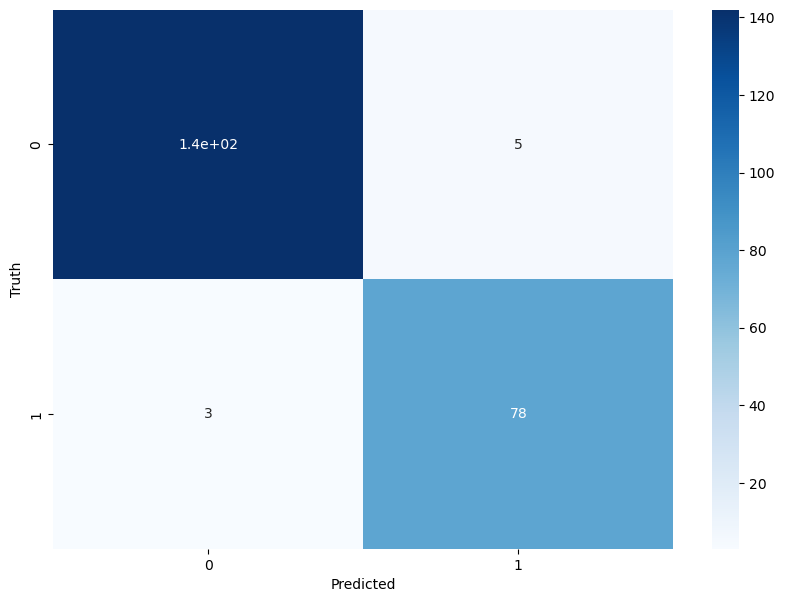


Validation score: 0.8596491228070176


In [74]:
# run logistic regression
log_reg = DecisionTreeClassifier()
run_model(log_reg, X_train, y_train, X_test, y_test, X_validation, y_validation)